In [1]:
import matplotlib.pyplot as plt
from fiberpy import *
from fiberoripy import *
from HomoPy.Methods import *
from HomoPy.Stiffness import *
from HomoPy.Stiffness_Plot import plot_E_body, polar_plot_E_body, polar_plot

In [2]:
# define fiber and matrix properties

Carbon_fiber = Isotropy(242e9, 0.1)
v_frac_carbon = 0.25
a_carbon = 347
Glass_fiber = Isotropy(80e9, 0.22)
v_frac_glass = 0.25
a_glass = 225
Polyamid6 = Isotropy(1.18e9, 0.35)

In [3]:
# Mori Tanaka
MT_carbon = Mori_Tanaka(Polyamid6, Carbon_fiber, v_frac_carbon, a_carbon)
MT_glass = Mori_Tanaka(Polyamid6, Glass_fiber, v_frac_glass, a_glass)

# Extract effective stiffness
C_eff_carbon = MT_carbon.get_effective_stiffness()
C_eff_glass = MT_glass.get_effective_stiffness()

# Invert to get effective compliance (needed for plotting)
S_eff_carbon = np.linalg.inv(C_eff_carbon)
S_eff_glass = np.linalg.inv(C_eff_glass)

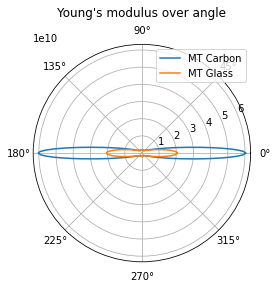

In [4]:
# polar plot of MT result
pC = polar_plot_E_body(S_eff_carbon, 400, 0, plot=False)
pG = polar_plot_E_body(S_eff_glass, 400, 0, plot=False)

polar_plot(
    [pC + ("MT Carbon",), pG + ("MT Glass",)]
) 

In [5]:
# Tsai Hill
E_carbon = 242e9; G_carbon = 105e9; nu_carbon = 0.1; l_carbon = 1.5e-3; 
r_carbon = 7.2 / 2 * 1e-6; vol_carbon = 0.25;
E_pa6 = 1.18e9; G_pa6 = 0.4e9; nu_pa6 = 0.35; 

TH_carbon = Tsai_Hill(
        E_carbon,
        E_pa6,
        G_carbon,
        G_pa6,
        nu_carbon,
        nu_pa6,
        l_carbon,
        r_carbon,
        vol_carbon,
    )

# define angles for laminat theory
angles = np.arange(0, 2 * np.pi, 0.01)
E_eff_carb = TH_carbon.get_E(angles)